## Ash Color Images Dataset Creation Notebook

We will create a Ash Color Images dataset of the satellite images of this competition for our models using this notebook. Some main points:
* Save only the labeled frame, which will be used for training.
* Save only the human_pixel_masks.
* Save the ash color image and the mask label in the same numpy file, so that we have to load only one file during training.
* Save the final numpy arrays in float16 dtype to reduce total data size.

In [1]:
import os
from tqdm import tqdm
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_record(record_id, directory, mode):
    record_data = {}
    if mode in ["train", "validation"]:
        bands_mask = ["band_11", "band_14", "band_15", "human_pixel_masks"]
    if mode == "test":
        bands_mask = ["band_11", "band_14", "band_15"]

    for x in bands_mask:
        record_data[x] = np.load(os.path.join(directory, record_id, x + ".npy"))
    return record_data


def normalize_range(data, bounds):
    """Maps data to the range [0, 1]."""
    return (data - bounds[0]) / (bounds[1] - bounds[0])


def get_false_color(record_data):
    _T11_BOUNDS = (243, 303)
    _CLOUD_TOP_TDIFF_BOUNDS = (-4, 5)
    _TDIFF_BOUNDS = (-4, 2)

    N_TIMES_BEFORE = 4

    r = normalize_range(record_data["band_15"] - record_data["band_14"], _TDIFF_BOUNDS)
    g = normalize_range(record_data["band_14"] - record_data["band_11"], _CLOUD_TOP_TDIFF_BOUNDS)
    b = normalize_range(record_data["band_14"], _T11_BOUNDS)
    false_color = np.clip(np.stack([r, g, b], axis=2), 0, 1)
    img = false_color[..., N_TIMES_BEFORE]

    return img

In [16]:
# # Train
# train_rs = os.listdir(data_dir + 'train')
# train_df = pd.DataFrame(train_rs, columns=['record_id'])
# save_dir="/kaggle/working/dataset_train/ash_color/"
# path = Path(save_dir)

# path.mkdir(exist_ok=True, parents=True)
# train_df.to_csv(path/'train_df.csv', index=False)
# for i in tqdm(train_rs):
#     data = read_record(str(i), data_dir+'train', "train")
#     img = get_false_color(data)
#     final = np.dstack([img, data['human_pixel_masks']])
#     final = final.astype(np.float16)

#     pathc = path/f"{i}.npy"
#     np.save(str(pathc), final)

# # Valid
# valid_rs = os.listdir(data_dir + 'validation')
# valid_df = pd.DataFrame(valid_rs, columns=['record_id'])
# save_dir="/kaggle/working/dataset_train/ash_color/"
# path = Path(save_dir)
# path.mkdir(exist_ok=True, parents=True)
# valid_df.to_csv(path/'valid_df.csv', index=False)
# for i in tqdm(valid_rs):
#     data = read_record(str(i), data_dir+'validation', "validation")
#     img = get_false_color(data)
#     final = np.dstack([img, data['human_pixel_masks']])
#     final = final.astype(np.float16)

#     pathc = path/f"{i}.npy"
#     np.save(str(pathc), final)

# # Test
# test_rs = os.listdir(data_dir + 'test')
# test_df = pd.DataFrame(test_rs, columns=['record_id'])
# save_dir="/kaggle/working/dataset_test/ash_color/"
# path = Path(save_dir)
# path.mkdir(exist_ok=True, parents=True)
# test_df.to_csv(path/'test_df.csv', index=False)
# for i in tqdm(test_rs):
#     data = read_record(str(i), data_dir+'test', "test")
#     img = get_false_color(data)
#     final = np.dstack([img])
#     final = final.astype(np.float16)

#     pathc = path/f"{i}.npy"
#     np.save(str(pathc), final)

100%|██████████| 20529/20529 [19:03<00:00, 17.95it/s]


In [27]:
def create_dataset(data_dir, save_dir, mode):
    input_dir=f"{data_dir}/{mode}"
    ids = os.listdir(input_dir)
    df = pd.DataFrame(ids, columns=['record_id'])
    os.makedirs(save_dir, exist_ok=True)
    df['path'] = save_dir + df['record_id'].astype(str) + '.npy'
    df.to_csv(f"{save_dir}/{mode}_df.csv", index=False)

    for record_id in tqdm(ids):
        data = read_record(str(record_id), input_dir, mode)
        images = get_false_color(data)
        if mode in ["train", "validation"]:
            array = np.dstack([images, data['human_pixel_masks']])
        if mode == "test":
            array = np.dstack([images])
        array = array.astype(np.float16)

        npy_path = f"{save_dir}/{record_id}.npy"
        np.save(str(npy_path), array)
        


In [29]:
data_dir = '/kaggle/input/google-research-identify-contrails-reduce-global-warming/'
dataset_train = "/kaggle/working/dataset_train/ash_color/"
dataset_test = "/kaggle/working/dataset_test/ash_color/"

create_dataset(data_dir, dataset_train, "train")
create_dataset(data_dir, dataset_train, "validation")
create_dataset(data_dir, dataset_test, "test")

  1%|          | 167/20529 [00:06<12:31, 27.09it/s]


KeyboardInterrupt: 

(256, 256, 3)
(256, 256)
(256, 256, 3)
(256, 256)
(256, 256, 3)
(256, 256)
(256, 256, 3)
(256, 256)
(256, 256, 3)
(256, 256)
(256, 256, 3)
(256, 256)
(256, 256, 3)
(256, 256)
(256, 256, 3)
(256, 256)
(256, 256, 3)
(256, 256)
(256, 256, 3)
(256, 256)


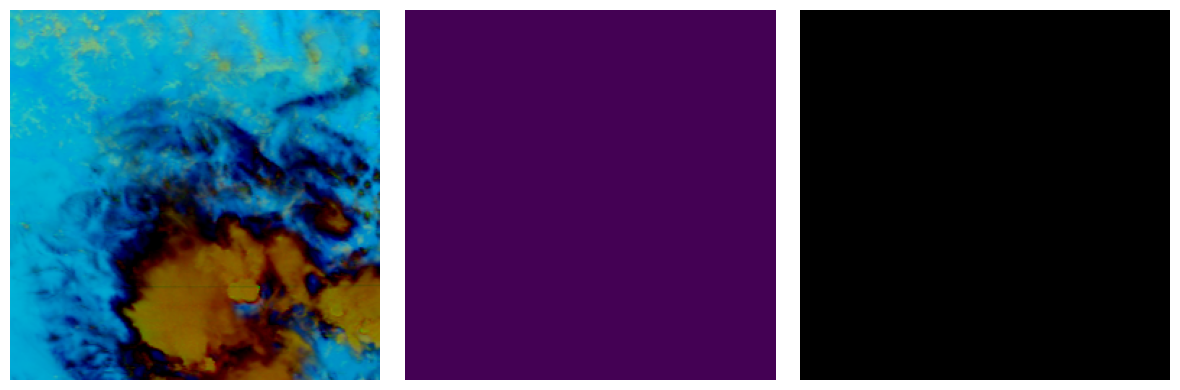

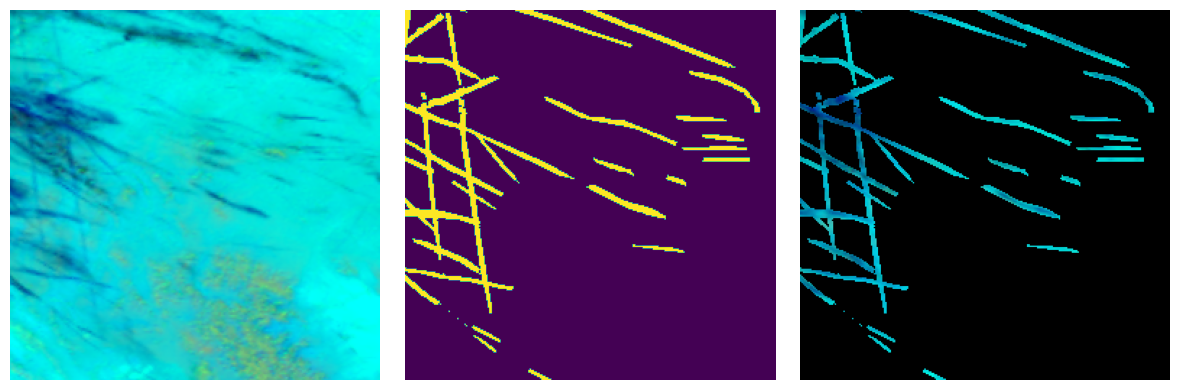

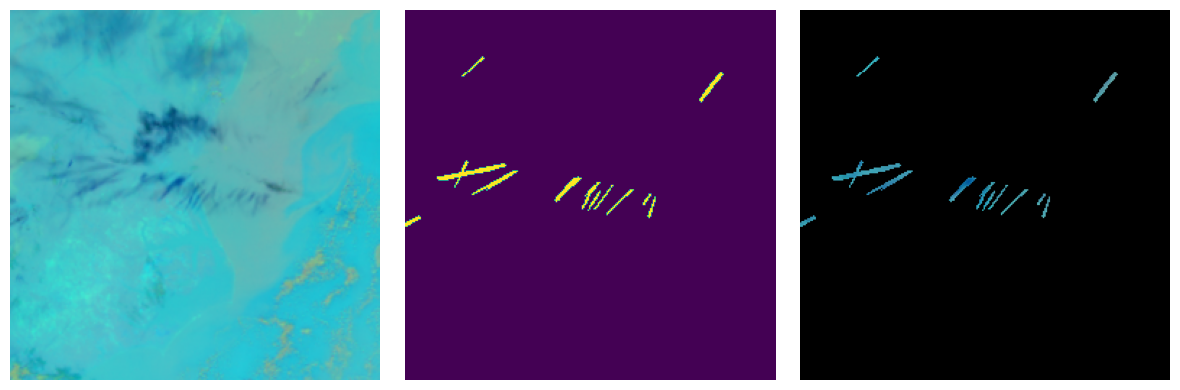

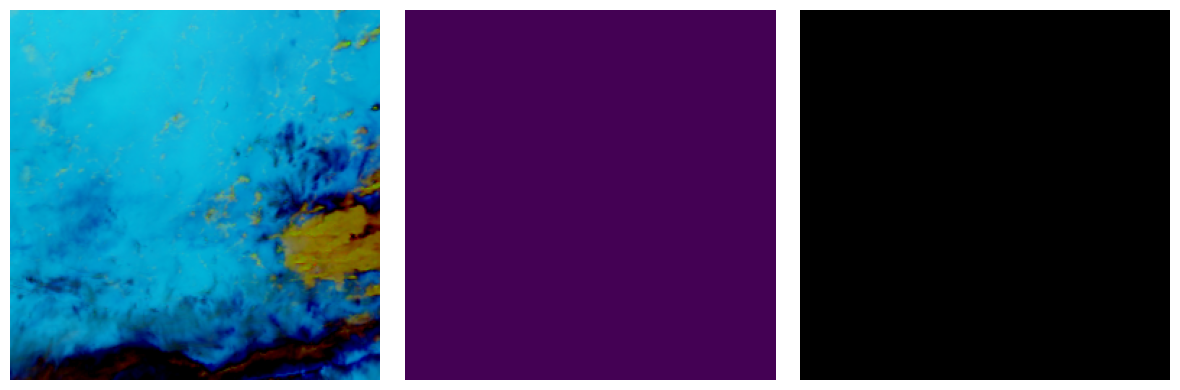

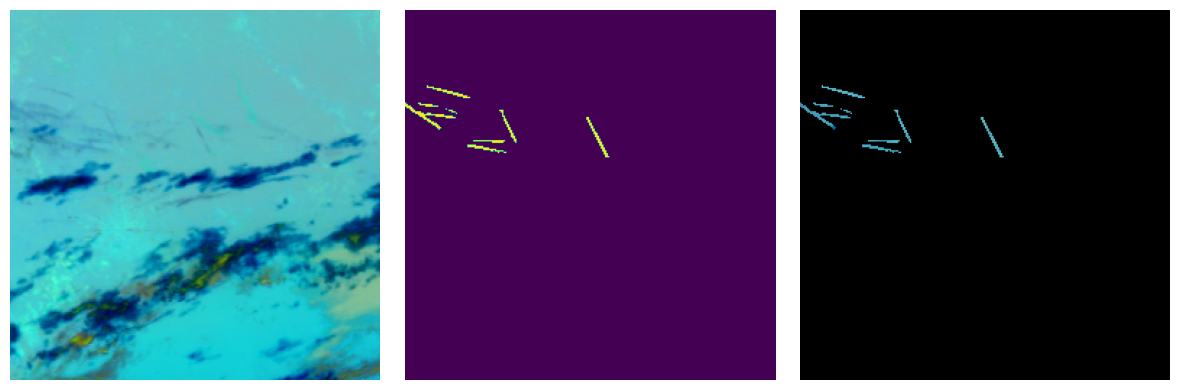

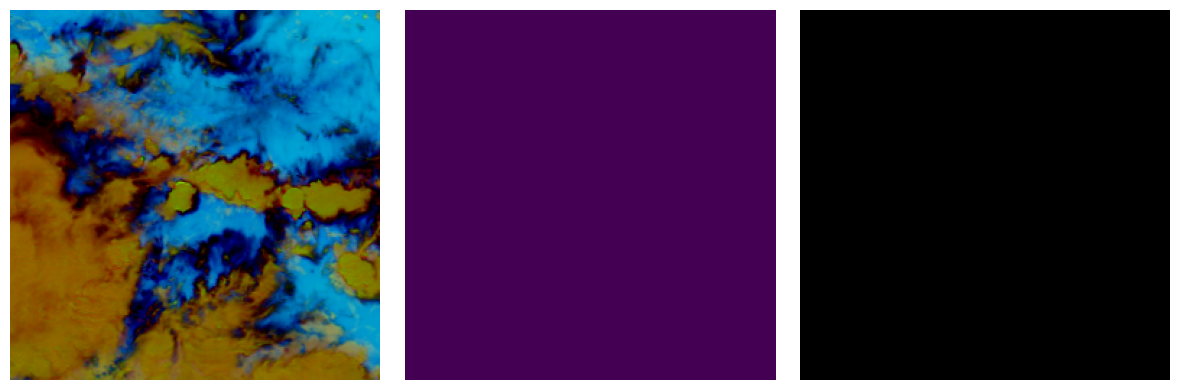

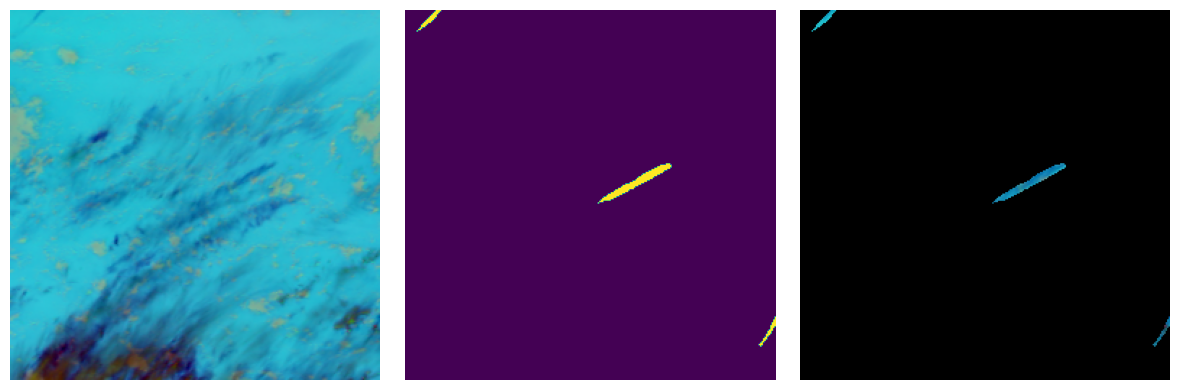

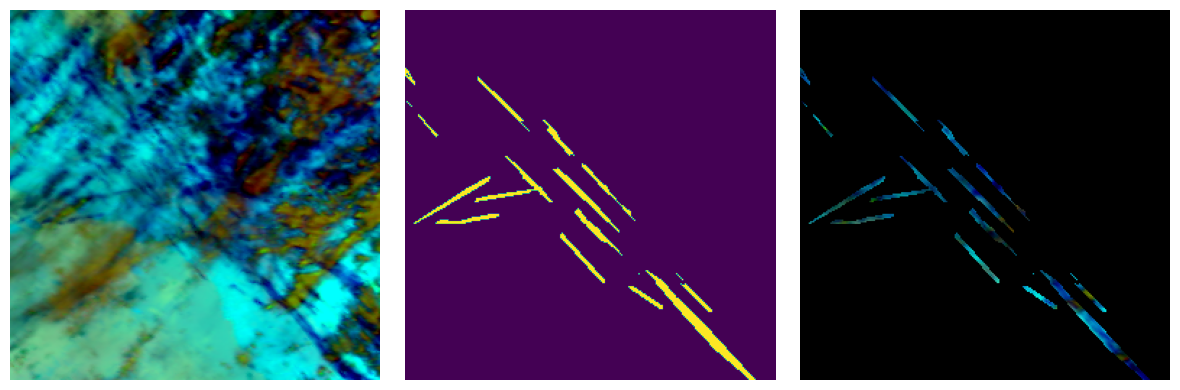

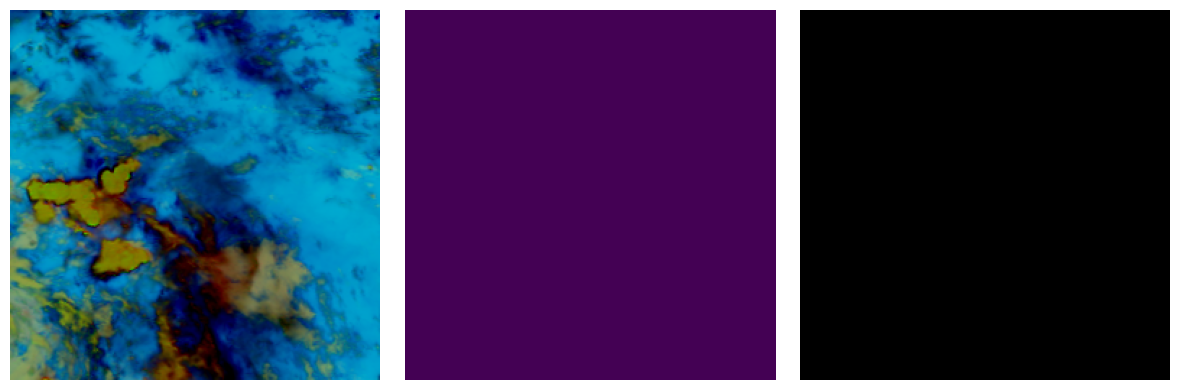

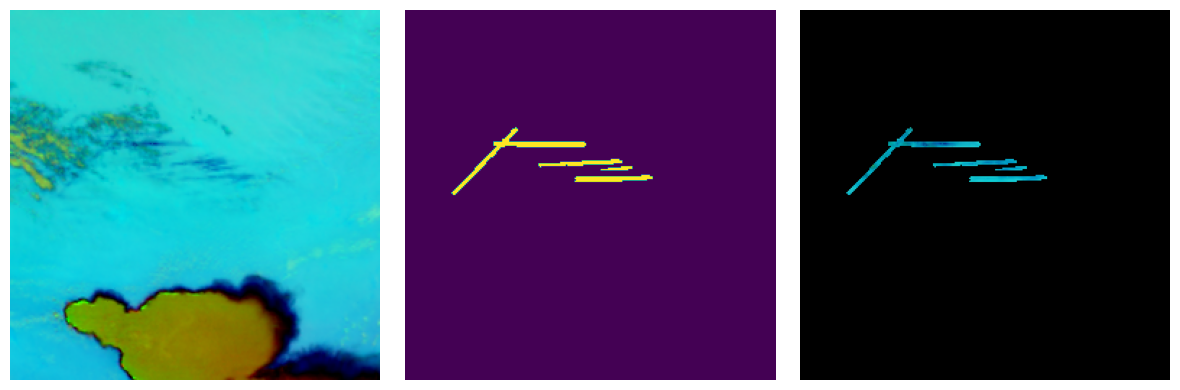

In [6]:
for i, id in enumerate(train_rs):
    if i>=100:continue
        
    npy=np.load(f"{path}/{id}.npy")
    img=(npy[:,:,:3]*255).astype("uint8")
    mask=(npy[:,:,-1]).astype("uint8")
    mask=np.expand_dims((npy[:,:,-1]).astype("uint8"),2)
    img_mask_product=img*mask
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    axes = axes.flatten()
    axes[0].imshow(img)
    axes[0].axis('off')
    axes[1].imshow(mask)
    axes[1].axis('off')
    axes[2].imshow(img_mask_product)
    axes[2].axis('off')
    # plt.suptitle(id)
    plt.tight_layout()
    # break

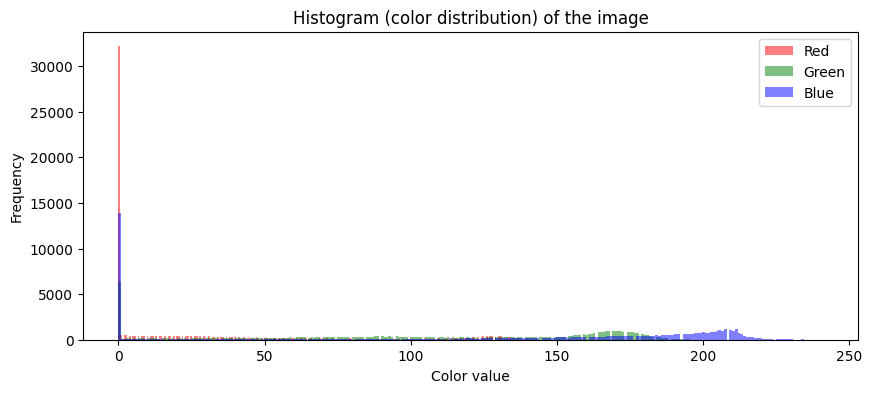

In [45]:
# RGBチャンネルを分割
img_=(img*255).astype("uint8")
r, g, b = img_[:,:,0], img_[:,:,1], img_[:,:,2]

# ヒストグラムを作成
plt.figure(figsize=(10,4))
plt.hist(r.ravel(), bins=256, color='red', alpha=0.5, label='Red')
plt.hist(g.ravel(), bins=256, color='Green', alpha=0.5, label='Green')
plt.hist(b.ravel(), bins=256, color='Blue', alpha=0.5, label='Blue')

plt.legend(loc='upper right')

plt.xlabel('Color value')
plt.ylabel('Frequency')
plt.title('Histogram (color distribution) of the image')

plt.show()